# In this task we are going to perform a classification task.

# The data contains the exam 1 and exam 2 scores of the student, and if they are admitted or not.

# The task is to classify whether the student will be admitted or not based on the exam 1 and exam 2 score.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


Import the lbraries

In [ ]:
# Your code to important Libraries - You need to import multiple libraries.
from scipy import optimize

# Read the data and split it into X and y.

# X is the exam scores and y is the binary variable to determine if a student is admitted or not.



In [ ]:
data = np.loadtxt("ex2data1.txt", delimiter=',')  # Note - The data is read using numpy rather than pandas.
X = data[:, [0, 1]]
y = data[:, 2]

# Print some samples of the input X

In [ ]:
# Your code to print samples of X

# Print some samples of the output y

In [ ]:
# Your code to print samples of y

# Plot the data

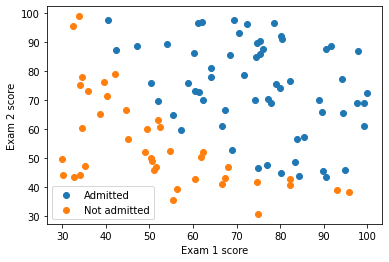

In [ ]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
# Your code to plot all samples with target value 0


plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

# Function for the Sigmoid

# $g(z) = \frac {1}{1 + e ^{-z}}$

In [ ]:
def sigmoid(z):
    # Your code to calculate the sigmoid values and then return it. Hint - np.exp()
    

# Plot the sigmod function.

# X axis will have numbers from -10 to 10 (could be any other range). Hint - You can use np.linespace or np.arange methods.

# y will have sigmoid function values.

In [ ]:
# Your code to plot x vs sigmoid (x) function. x is range from -10 to 10. 
# y can be obtained by calling the function defined earlier

plt.show()

# Define a function to calculate the cost.

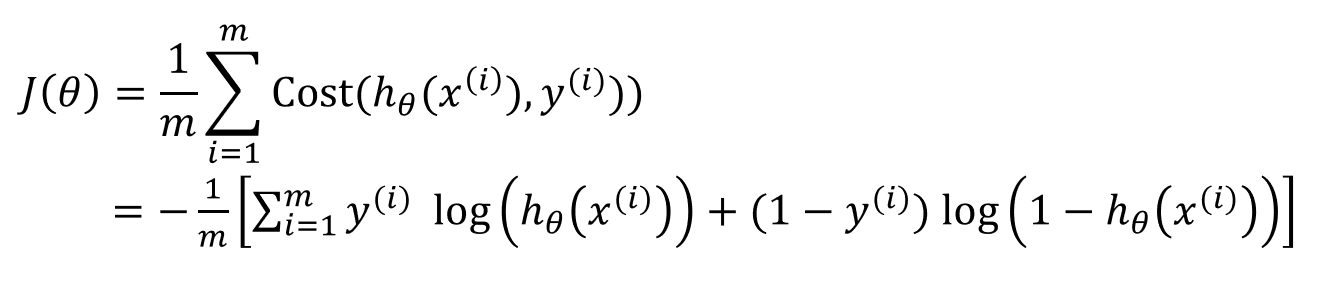

# Hint - Use the sigmoid function output, np.dot, and np.log functions.

In [ ]:
def cost(theta, X, y):

    # Your code to calculate the cost based on inputs - theta, X, y. 
    # 2-3 lines of code.  Assign cost to the variable J and return it.

    return J

# Define a function to calculate gradients of cost function with respect to the theta.

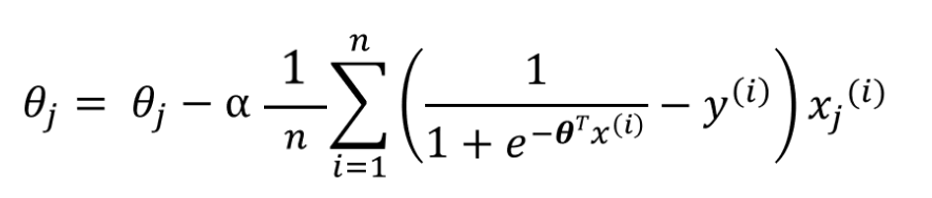

In [ ]:
def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad

# Combine everything together.

# This time we will use optimize function from scipy rather than writing gradient descent code from scratch

In [ ]:
# add a column with ones to X
X_train = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем единичный столбец в X

# Your code to print samples of X_train:



In [ ]:
# initiate 'theta' with zeros:
theta = np.array([0, 0, 0])

# Your code to print 'theta'



In [ ]:
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y),
                        method='Newton-CG', jac=gradient)    # Note - Optimization method is Newton - CG rather that 
                                                    # gradient descent. You can use other optimization methods too.
print(res.fun)  # 0.203
print(res.x)  # -25.161 0.206 0.201


# Plotting the decision boundary

In [ ]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)

    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

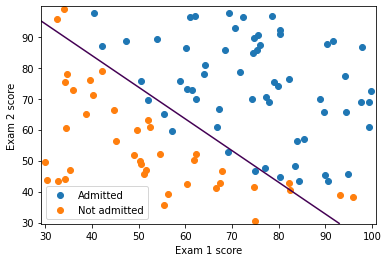

In [ ]:
plotDecisionBoundary(res.x, X, y)


# Getting the output - Probabilities.

# What will be the output 1/0 for the following probability?

In [ ]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print(prob)  # 0.775 +/- 0.002

0.7762171177134657


# Making predictions

# First, we get input X

# Then probability using sigmod and updated theta values.

# Then we will get output 1/0 based on the probability.

In [ ]:
def predict(theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))

    # Your code to calculate the probability and convert it to 0 and 1 which will be returned. May be 2-3 lines of code.

#  Calculating accuracy - number of correct classification/total number of classification.

In [ ]:
np.mean(predict(res.x, X) == y) 


# **Important-** Document in your lab logbook, final accuracy and the  encrypted value of the accuracy obtained after after multiplying accuracy by your SID i.e. accuracy*SID.  

# **The rest of the notebook is optional. You are encouraged to complete it. But, if you have not, marks will not be deducted.**

# Using SKlearn library to perform logistic regression task.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from matplotlib.colors import ListedColormap



# Splitting the data into training and test sets

In [ ]:
# Your cose to split the data using sklearn train_test_split

# Scaling the data - Converting everthing between 0-1

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Running Logistc Regression on training data -

# Remember - any kind of fit methiod  will be always used for the training data.

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

Making a prediction on the classifier.

# Making a prediction on the test set dataset.

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Getting the accuracy scores.

## Will study in detail in class.



In [ ]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

# Plotting the Confusion Matrix.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()


In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [ ]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X, Y = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

probs = classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contourf(X, Y, probs, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolor="white")

plt.title('Logistic Regression Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()